$$d = \frac{{c^{-\frac{1}{\alpha}} \cdot r^{-1 + \frac{1}{\alpha}} \cdot Q}}{{\sum_{i} c^{1 - \frac{1}{\alpha}} \cdot r^{-1 + \frac{1}{\alpha}}}} $$

In [9]:
import cvxpy as cp
import numpy as np
import warnings
import sys
from IPython.core.interactiveshell import InteractiveShell
import torch
import torch.nn as nn
import torch.optim as optim
import time
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"
sys.path.insert(1,'/Users/dennis/Documents/myGit/main/myUtils')

from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

# Generate synthetic data
import genData
import optDatasetRd
import optModelRd

In [14]:
# Generate synthetic data
num_data = 10
num_items = 4
num_features = 5

x, r, c, Q = genData.genDataRd(num_data,num_features, num_items,Q = 100)
alpha = 0.5

array([[0.57349381, 0.56489568, 0.50127836, 0.44162069],
       [0.19538833, 0.39636234, 0.41515024, 0.3095386 ],
       [0.45976575, 0.59966053, 0.86832004, 0.54353394],
       [0.56403403, 0.48139711, 0.12799865, 0.49337192],
       [0.515053  , 0.92152444, 0.4520575 , 0.57482073],
       [0.49132293, 0.23709402, 0.75819753, 0.67959975],
       [0.68805287, 0.2871252 , 0.80262693, 0.19752254],
       [0.64264369, 0.89938914, 0.27080616, 0.36209154],
       [0.52489225, 0.37672423, 0.17499047, 0.51713403],
       [0.25686946, 0.61623368, 0.28507523, 0.82490426]])

In [7]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [8]:
dataset = optDatasetRd.optDatasetRd(x,r,c,Q,alpha, num_items,num_data)

ValueError: Cannot broadcast dimensions  (4,) (20, 4)

In [ ]:
dataset.opt_solutions_solver.shape

(20, 4)

In [ ]:
print('Sample data:\n')
dataset.__getitem__(3)

Sample data:



(tensor([-0.6017,  1.8523, -0.0135, -1.0577,  0.8225, -1.2208,  0.2089, -1.9597,
         -1.3282,  0.1969]),
 tensor([0.4458, 0.7500, 0.6954, 0.6929]),
 tensor([5., 6., 4., 6.]),
 tensor([0.1771, 0.2069, 0.4316, 0.1911]),
 tensor([63.4657]),
 tensor([[3.5417, 4.1380, 8.6321, 3.8226]]),
 tensor([14.1914]))

In [ ]:
optmodel = 

SyntaxError: invalid syntax (2075467184.py, line 1)

In [ ]:
# Train-test split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"Train size: {len(train_dataset)}", f"Test size: {len(test_dataset)}")

Train size: 400 Test size: 100


In [ ]:
# Data loaders
batch_size = 32
loader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Log Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_items)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# init model
model = LogisticRegressionModel(num_features)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.05)



In [ ]:
%%capture
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(loader_train, 0):
        x,r,c,opt_sol,opt_obj,copt_sol,copt_obj = data
        x,r = x.to(device), r.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, r)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss}")

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training Loss Curve')

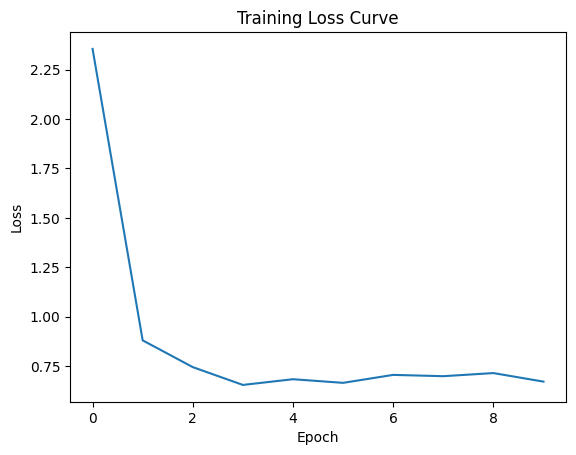

In [ ]:
# Plot the loss curve
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

In [ ]:
# test regret
from regret import calRegret, regret

tensor([[0.6833, 0.3711, 0.4987, 0.5984],
        [0.4472, 0.6323, 0.4163, 0.5006],
        [0.3713, 0.2104, 0.6009, 0.6607],
        [0.4897, 0.8965, 0.5228, 0.4060],
        [0.1608, 0.7245, 0.6329, 0.6105],
        [0.7408, 0.5805, 0.5357, 0.1511],
        [0.6643, 0.7204, 0.6466, 0.3989],
        [0.3927, 0.3012, 0.3828, 0.4889],
        [0.4792, 0.6568, 0.3579, 0.9207],
        [0.4387, 0.6759, 0.5016, 0.1361],
        [0.3564, 0.6083, 0.1725, 0.6124],
        [0.4092, 0.5714, 0.2379, 0.4114],
        [0.4569, 0.3928, 0.6088, 0.3207],
        [0.5623, 0.6918, 0.4343, 0.3156],
        [0.5758, 0.3249, 0.2895, 0.3458],
        [0.1671, 0.5975, 0.7452, 0.2987]])

In [ ]:
optmodel = optModel.optModelRd(num_items, alpha, Q, r, c)
regret00 = regret(model, optmodel, loader_train)

ValueError: Cannot broadcast dimensions  (16, 4) (4,)

In [ ]:
# Gradient calculation for the closed-form solution
def closed_form_solution(r, c, Q, alpha):
    A = c ** (-1 / alpha) * r ** (-1 + 1/alpha)
    S = np.sum(c ** (1 - 1/alpha) * r ** (-1 + 1/alpha))
    return (A * Q) / S

def closed_form_objective(r, c, Q, alpha):
    d = closed_form_solution(r, c, Q, alpha)
    return np.sum((r * d)**(1-alpha)) / (1-alpha)

# Analytical gradient calculation
def analytical_gradient(r, c, Q, alpha):
    A = c ** (-1 / alpha) * r ** (-1 + 1/alpha)
    S = np.sum(c ** (1 - 1/alpha) * r ** (-1 + 1/alpha))
    d = (A * Q) / S
    
    dA_dr = (-1 + 1/alpha) * c ** (-1 / alpha) * r ** (-2 + 1/alpha)
    dS_dr = np.sum((1 - 1/alpha) * c ** (1 - 1/alpha) * r ** (-2 + 1/alpha))
    
    d_d_r = (dA_dr * Q * S - A * Q * dS_dr) / (S ** 2)
    d_objective_dr = (1-alpha) * np.sum(r ** (1-alpha) * d_d_r) / (1-alpha)
    
    return d_objective_dr

In [ ]:
import torch

In [ ]:
# Analytical gradient calculation
def analytical_gradient(r, c, Q, alpha):
    A = c ** (-1 / alpha) * r ** (-1 + 1/alpha)
    S = np.sum(c ** (1 - 1/alpha) * r ** (-1 + 1/alpha))
    d = (A * Q) / S
    
    dA_dr = (-1 + 1/alpha) * c ** (-1 / alpha) * r ** (-2 + 1/alpha)
    dS_dr = (1 - 1/alpha) * c ** (1 - 1/alpha) * r ** (-2 + 1/alpha)
    
    d_d_r = (dA_dr * Q * S - A * Q * dS_dr) / (S ** 2)
    d_objective_dr = (1-alpha) * ((r * d)**(1-alpha-1) * d + (r**(1-alpha) * d_d_r))
    
    return d_objective_dr

# PyTorch gradient calculation
r_torch = torch.tensor(r, requires_grad=True)
c_torch = torch.tensor(c)
Q_torch = torch.tensor(Q)
alpha_torch = torch.tensor(alpha)

A_torch = c_torch ** (-1 / alpha_torch) * r_torch ** (-1 + 1/alpha_torch)
S_torch = torch.sum(c_torch ** (1 - 1/alpha_torch) * r_torch ** (-1 + 1/alpha_torch))
d_closed_form_torch = (A_torch * Q_torch) / S_torch
objective_closed_form_torch = torch.sum((r_torch * d_closed_form_torch)**(1-alpha_torch)) / (1-alpha_torch)
objective_closed_form_torch.backward()
grad_torch = r_torch.grad.numpy()

# Print gradients
print("Analytical gradient:", analytical_gradient(r, c, Q, alpha))
print("PyTorch gradient:", grad_torch)

TypeError: sum() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
      didn't match because some of the keywords were incorrect: out, axis
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)
